

# **Background and Context**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

### Data Dictionary

### Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

## Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

Note:

Please note XGBoost can take a significantly longer time to run, so if you have time complexity issues then you can avoid tuning XGBoost. No marks will be deducted if XGBoost tuning is not attempted.

#### Best Practices for Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
The notebook should be submitted as an HTML file (.html) and as a notebook file (.ipynb)



## Overview of the dataset 

**Import Libraries.**

In [11]:
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
#Loading dataset and second worksheet
data =pd.read_excel('Tourism.xlsx', sheet_name="Tourism")

**View the first 5 rows of the dataset.**

In [13]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


**Check data types and number of non-null values for each column.**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- We can see that there are total of 20 columns and 4,888 rows in the dataset.
- Columns are a mix of int, float and object
- There are missing values in age, TypeofContract, DurationOfPitch, Number of Followups, PreferredPropertyStar, NumberofTrips,NumberofChildrenVisiting, MonthlyIncome

In [15]:
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

- There are several missing values as mentioned above

**Summary of the dataset**

In [16]:
# Summary of continuous columns
data[['Age','DurationOfPitch','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips', 'NumberOfChildrenVisiting',  'MonthlyIncome']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


- The mean and median value of Age is 37.6 and 36 years of age
- The mean and median value for 'DurationofPitch' is 15.4 and 13
- The mean and median value for 'NumberOfFollowups' is 3.7 and 4
- The mean and median value for 'PreferredPropertyStars' is 3.5 and 3
- The mean and median value for 'NumberOfTrips' is 3.3 and 3
- The mean and median value for 'NumberOfChildrenVisiting' is 1.2 and 1
- The mean and median value for 'MonthlyIncome' is 23619 and 22347

**Number of unique values in each column**

In [17]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

- We can drop 'CustomerID' variable and will not add value to the model.

In [18]:
#Making a copy of data
newdata = data.copy()

In [19]:
#Dropping CustomerID
newdata.drop(columns=['CustomerID'], inplace=True)

**Number of observations in each category**

In [20]:
cat_cols=['ProdTaken', 'TypeofContact', 'CityTier', 'Occupation' ,'Gender', 'NumberOfPersonVisiting', 'ProductPitched', 'MaritalStatus','Passport','PitchSatisfactionScore', 'OwnCar','Designation']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

0    3968
1     920
Name: ProdTaken, dtype: int64
------------------------------
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
------------------------------
0    3466
1    1422
Name

- There is a typo within Gender (Fe Male), will change to Female in the next steps
- Married people a little less than half of the observations
- Executive and Manager comprise most of the data

In [21]:
# replacing Fe Male for Female
newdata["Gender"].replace({"Fe Male": "Female"}, inplace=True)

In [22]:
newdata['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

## Imputing median and mode where data is missing

In [23]:

newdata['Age'].fillna(newdata['Age'].median(), inplace = True)

In [24]:
newdata['TypeofContact'].fillna(newdata['TypeofContact'].mode()[0], inplace = True)

In [25]:
newdata['DurationOfPitch'].fillna(newdata['DurationOfPitch'].median(), inplace = True)

In [26]:
newdata['NumberOfFollowups'].fillna(newdata['NumberOfFollowups'].median(), inplace = True)

In [27]:
newdata['PreferredPropertyStar'].fillna(newdata['PreferredPropertyStar'].median(), inplace = True)

In [28]:
newdata['NumberOfTrips'].fillna(newdata['NumberOfTrips'].median(), inplace = True)

In [29]:
newdata['NumberOfChildrenVisiting'].fillna(newdata['NumberOfChildrenVisiting'].median(), inplace = True)

In [30]:
newdata['MonthlyIncome'].fillna(newdata['MonthlyIncome'].median(), inplace = True)

In [31]:
#Check for missing values
newdata.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## EDA

### Univariate analysis

In [32]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Observations on Age**

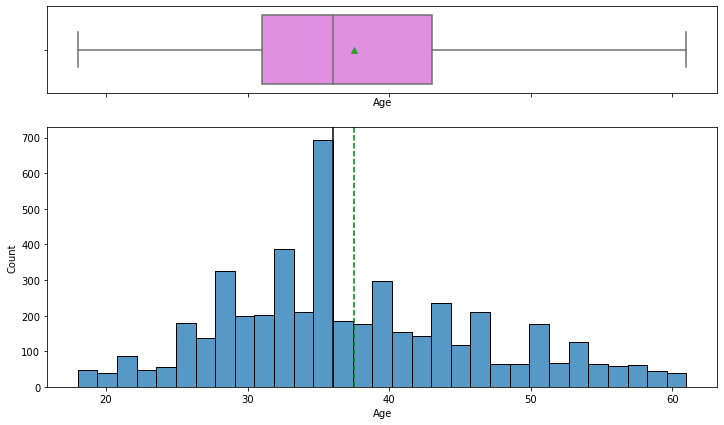

In [33]:
histogram_boxplot(newdata, "Age")

- Age is skewed to the right with a mean and median close to 36.5 years of age

**Observations on 'DurationOfPitch'**

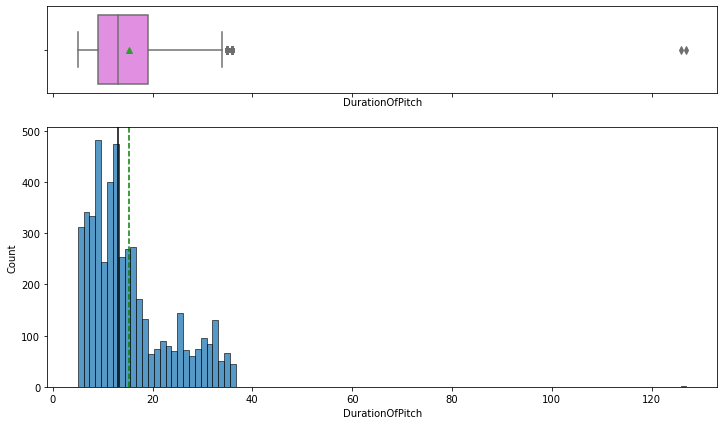

In [34]:
histogram_boxplot(newdata, "DurationOfPitch")

- DurationOfPitch is skewed to the right with a median and mean close to 15.5

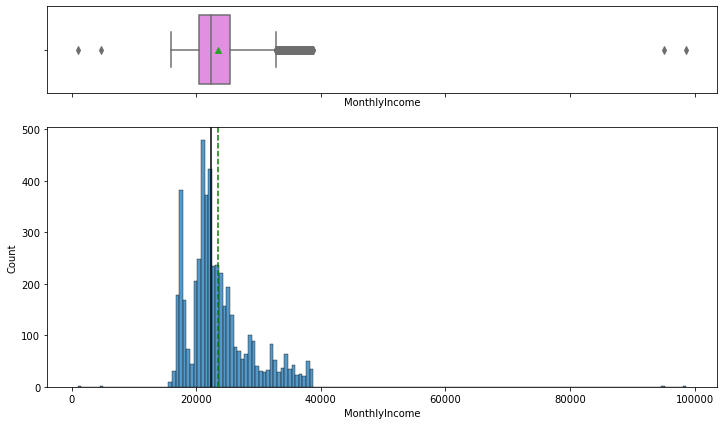

In [35]:
histogram_boxplot(newdata,"MonthlyIncome")

-The MonthlyIncome is skewed with a mean and median close to 23,000

**Function to create barplots that indicate percentage for each category**

In [36]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

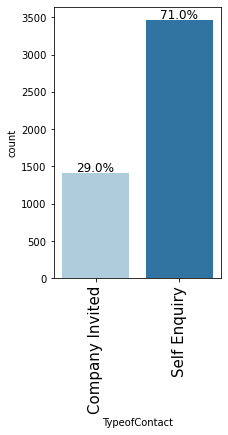

In [37]:
labeled_barplot(newdata, "TypeofContact",perc=True)

Two thirds of the opportunities are from Self Enquiries

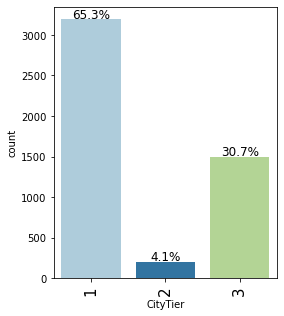

In [38]:
labeled_barplot(newdata,'CityTier',perc=True)

Tier 1 and Tier 3 cities constitute the majority of the data at more than 90%

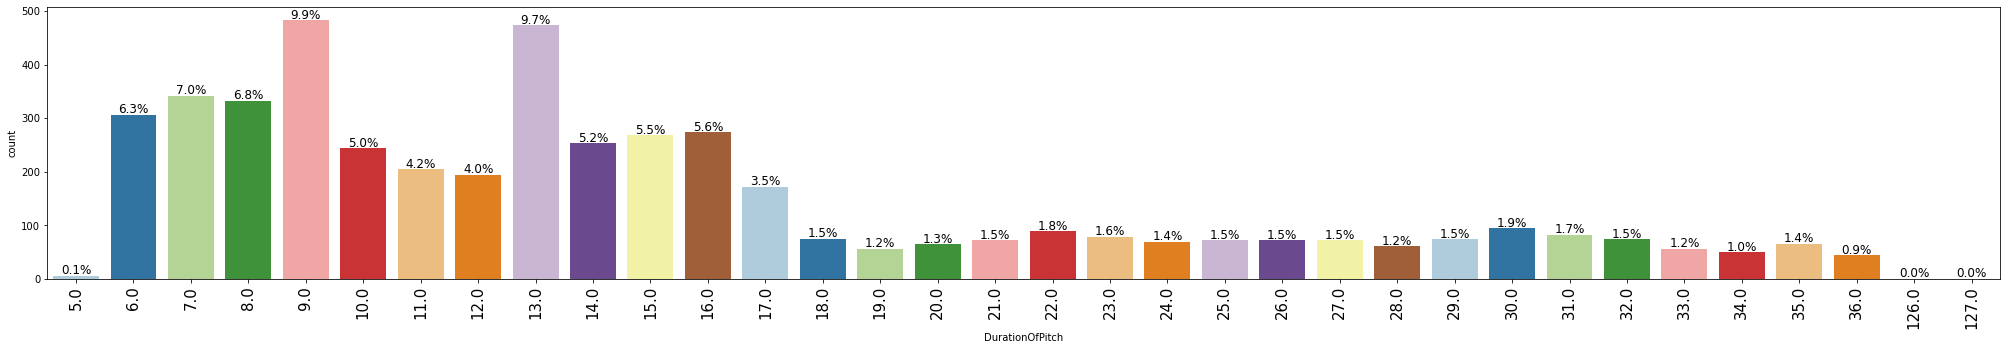

In [39]:
labeled_barplot(newdata,'DurationOfPitch',perc=True)

The data is skewed to lower pitch time

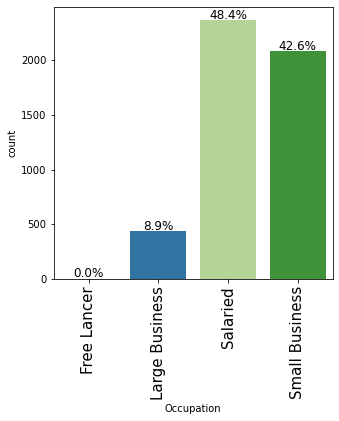

In [40]:
labeled_barplot(newdata,'Occupation',perc=True)

Salaried and small business are the biggest percent of the business

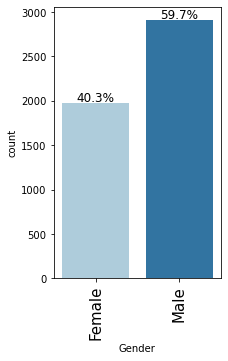

In [41]:
labeled_barplot(newdata,'Gender',perc=True)

- The ratio is close to 1:1 in between Male and Female

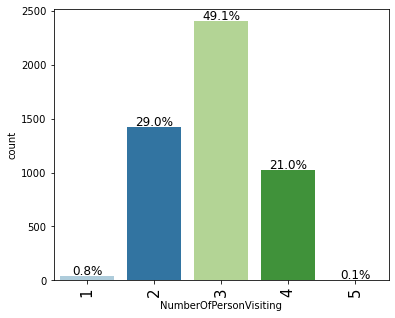

In [42]:
labeled_barplot(newdata,'NumberOfPersonVisiting',perc=True)

- This denotes that most travel is with familes at 2, 3, 4 persons visiting with the customer

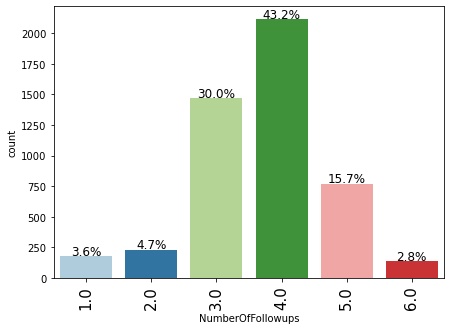

In [43]:
labeled_barplot(newdata,'NumberOfFollowups',perc=True)

- There are 3-4 follow ups after the initial pitch in almost 75% of the cases

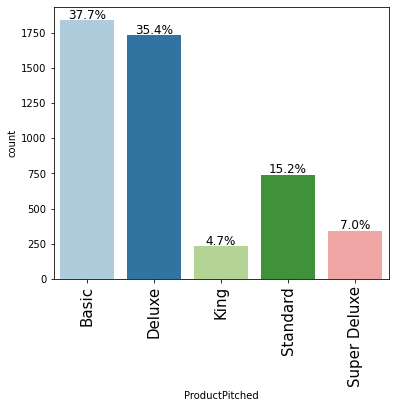

In [44]:
labeled_barplot(newdata,'ProductPitched',perc=True)

- Basic and Deluxe packages constitute almost 72% of customer data

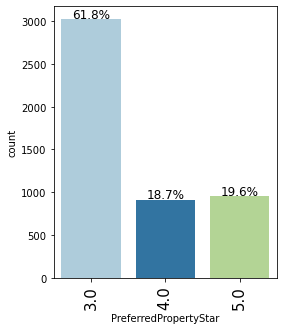

In [45]:
labeled_barplot(newdata,'PreferredPropertyStar',perc=True)

- two thirds of customer packages use 3 star properties

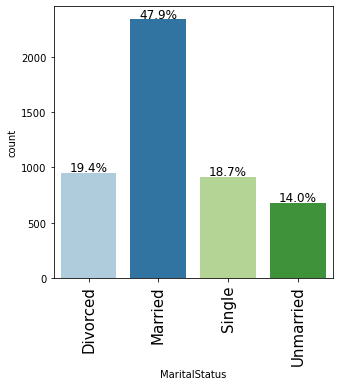

In [46]:
labeled_barplot(newdata,'MaritalStatus',perc=True)

- Married people are half of the customers 

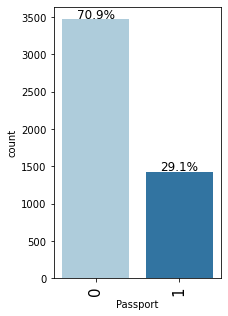

In [47]:
labeled_barplot(newdata,'Passport',perc=True)

- Most of the customer base do not have a passport

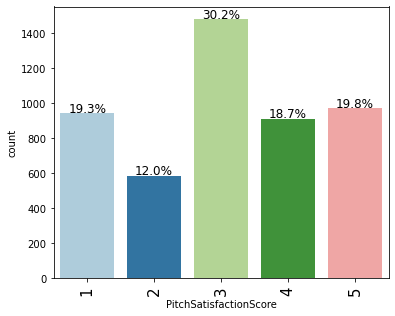

In [48]:
labeled_barplot(newdata,'PitchSatisfactionScore',perc=True)

- Almost 70% of the scores are above 3

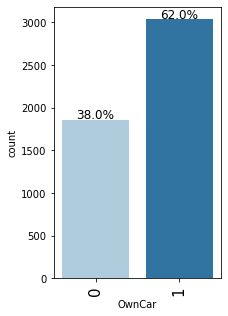

In [49]:
labeled_barplot(newdata,'OwnCar',perc=True)

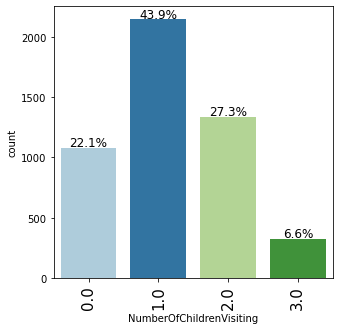

In [50]:
labeled_barplot(newdata,'NumberOfChildrenVisiting',perc=True)

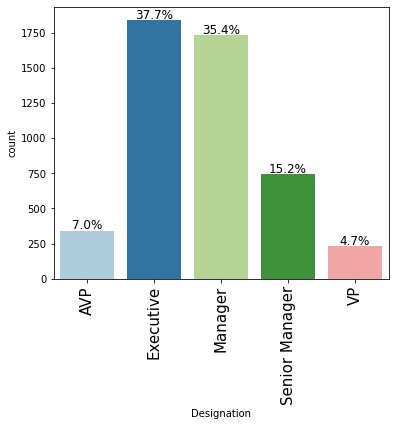

In [51]:
labeled_barplot(newdata,'Designation',perc=True)

- Executives and managers constitute more than 70% of the data

In [52]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

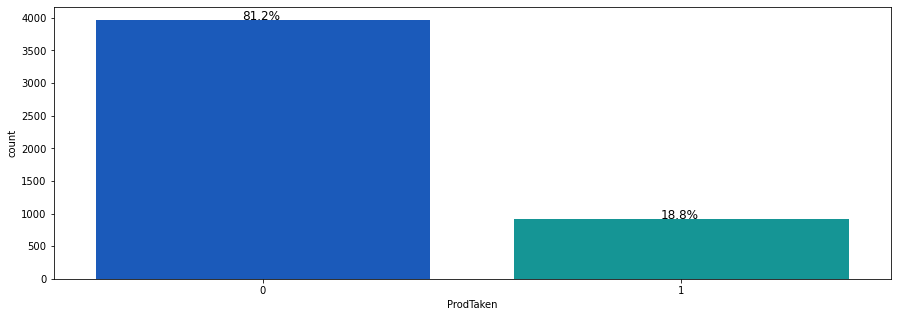

In [53]:
plt.figure(figsize=(15,5))
ax = sns.countplot(newdata["ProdTaken"],palette='winter')
perc_on_bar(ax,data["ProdTaken"])

- 81.2% of the product is not bough or taken

## Bivariate Analysis

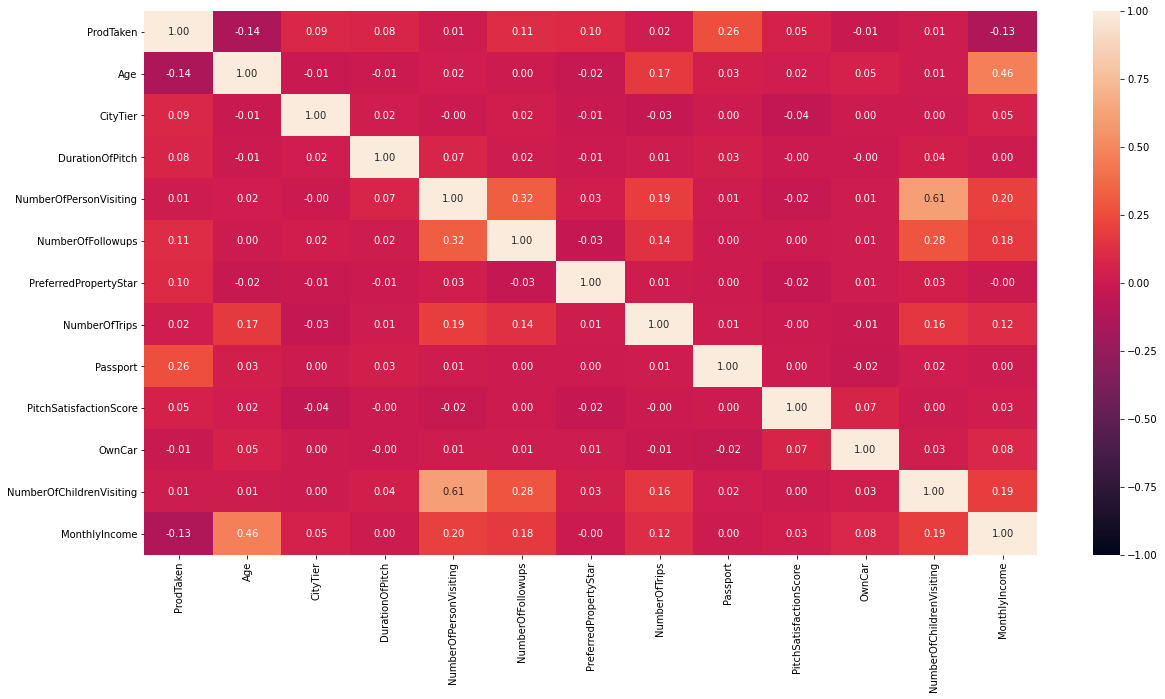

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(newdata.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

- The correlationn matrix does not show correlation in between features except in between NumberOfPersonVisiting and NumberOfChildrenVisiting at 0.61. Both features will be kept for the study

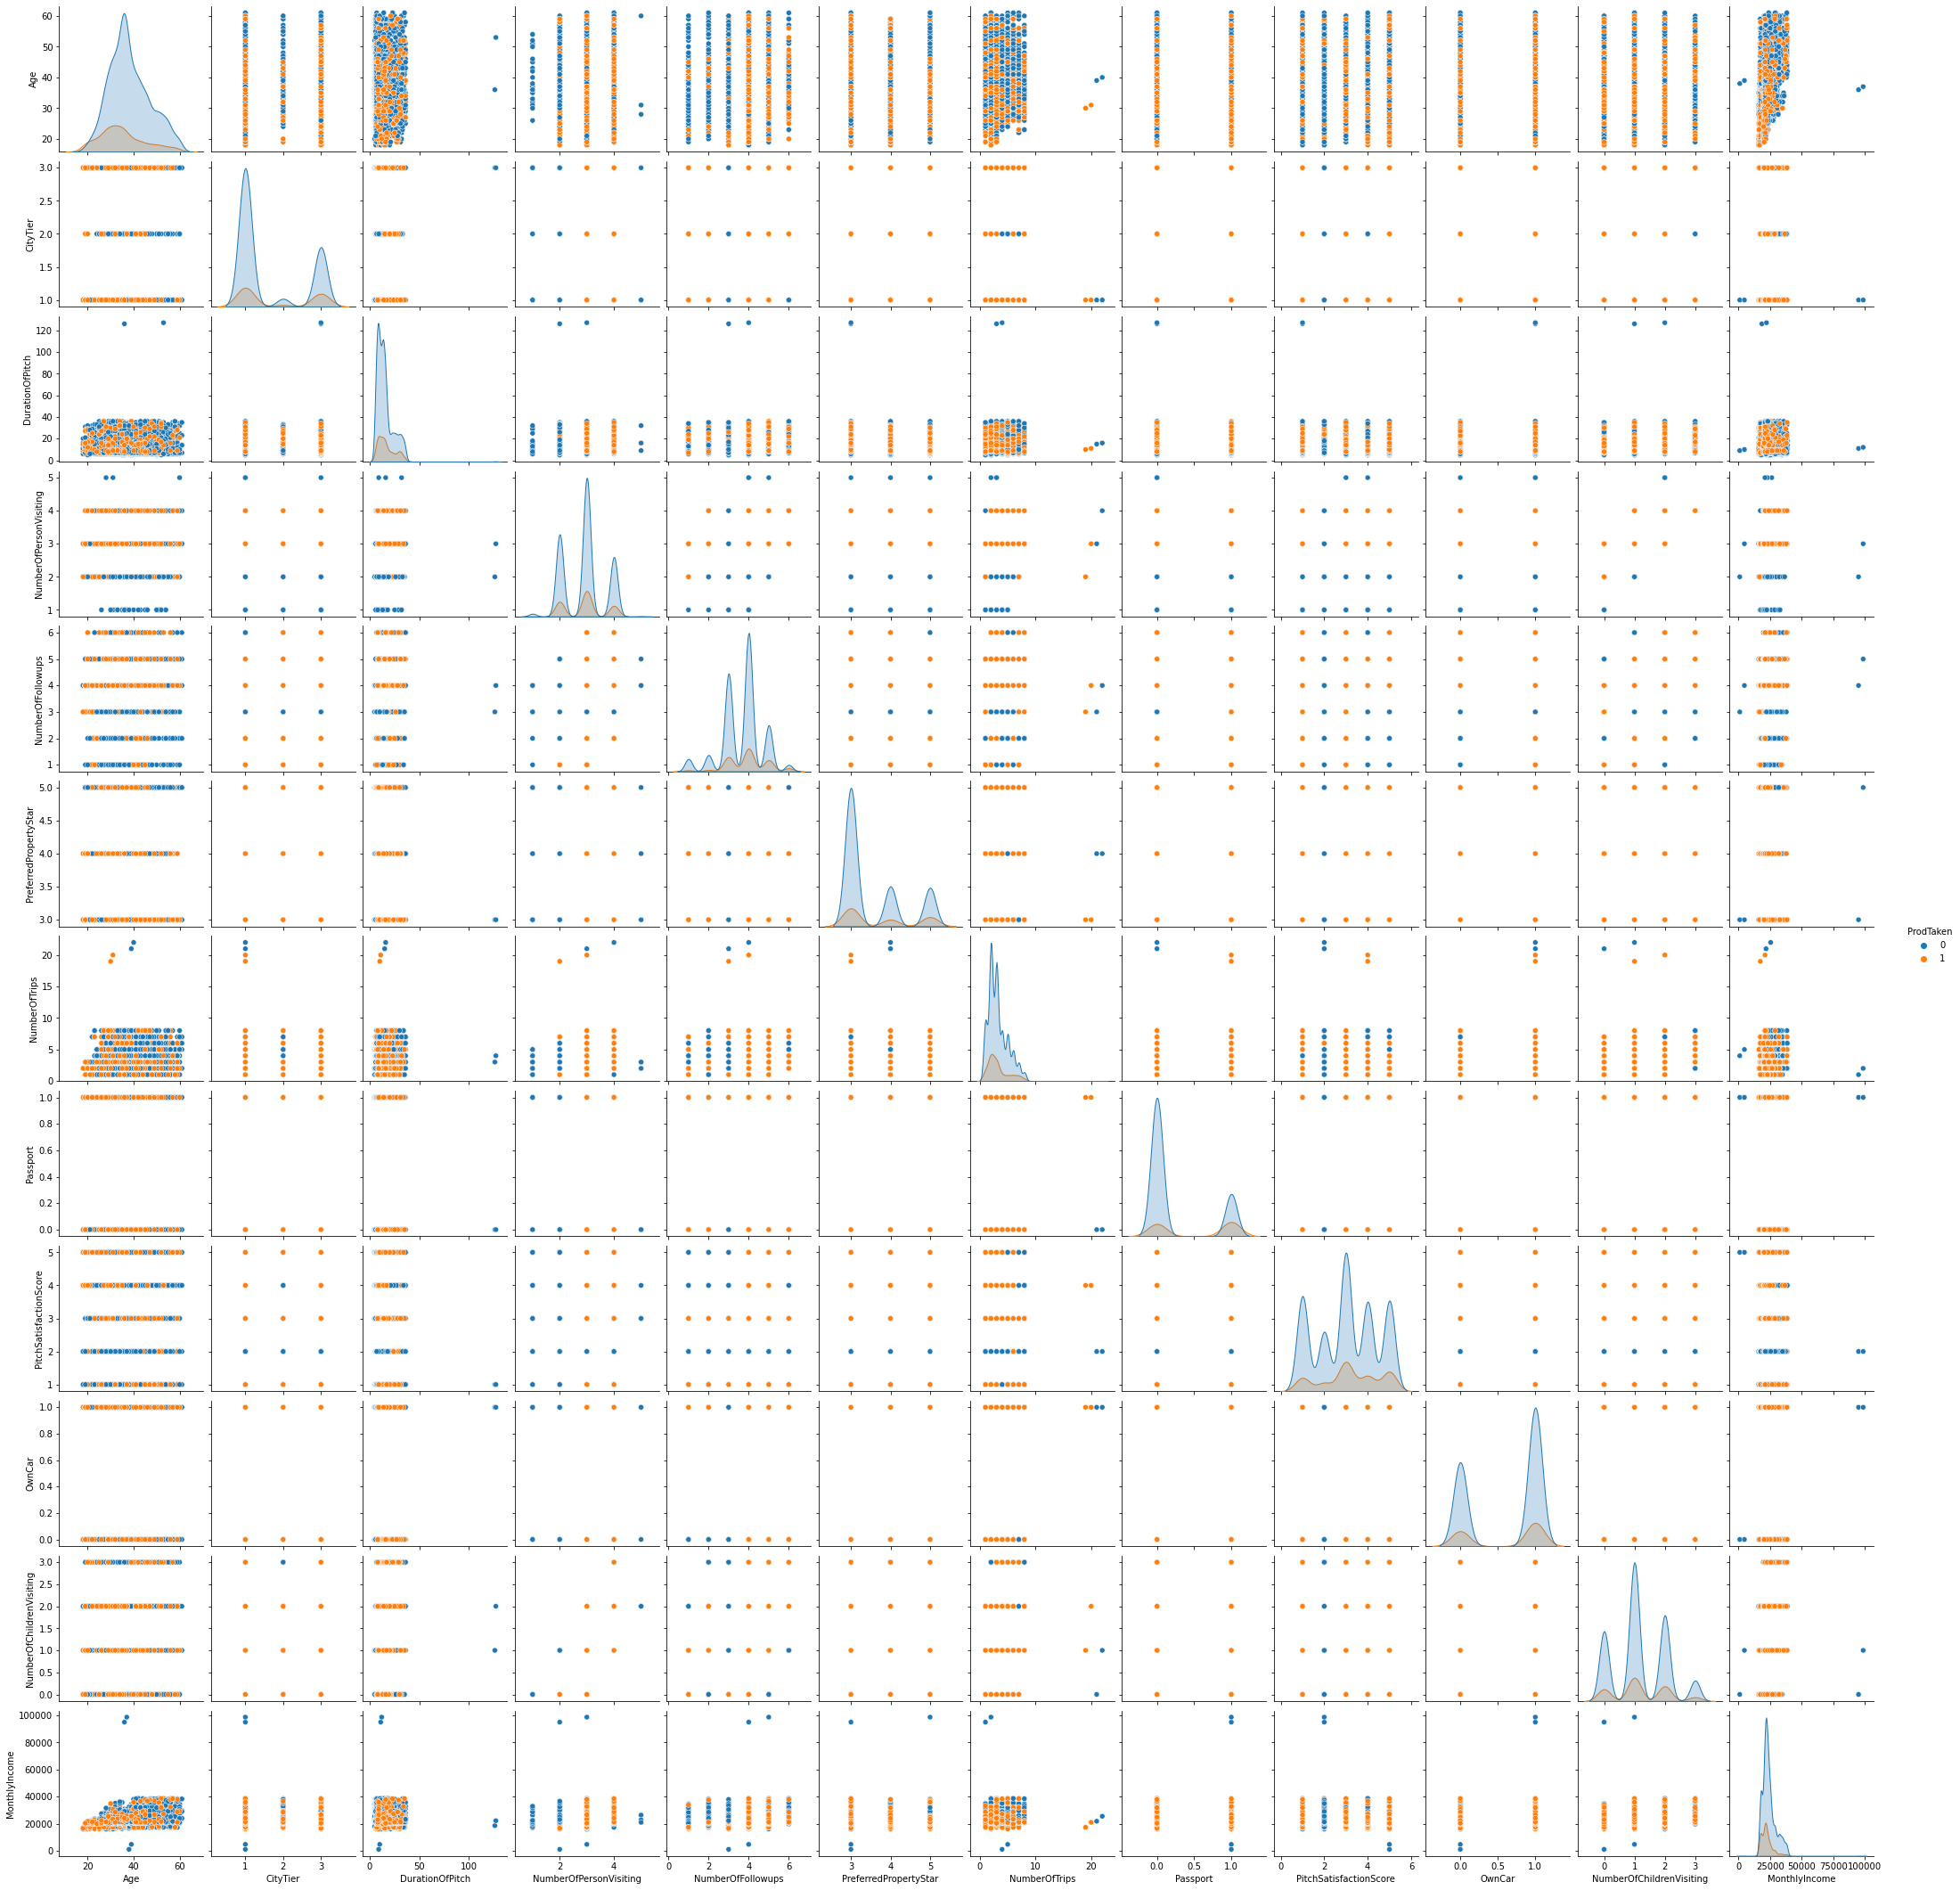

In [55]:
sns.pairplot(newdata,hue='ProdTaken')
plt.show()

- There are several distributions for ProdTaken, more analysis will be conducted below

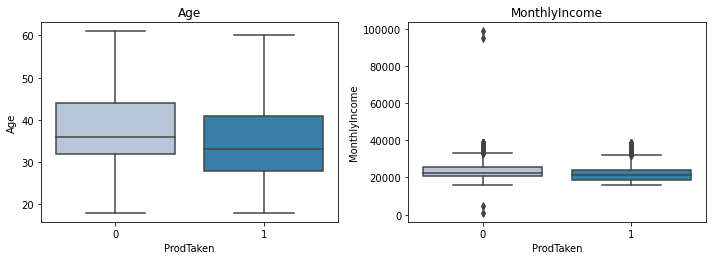

In [56]:
cols = newdata[['Age','MonthlyIncome']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["ProdTaken"],newdata[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [57]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,newdata['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,newdata['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


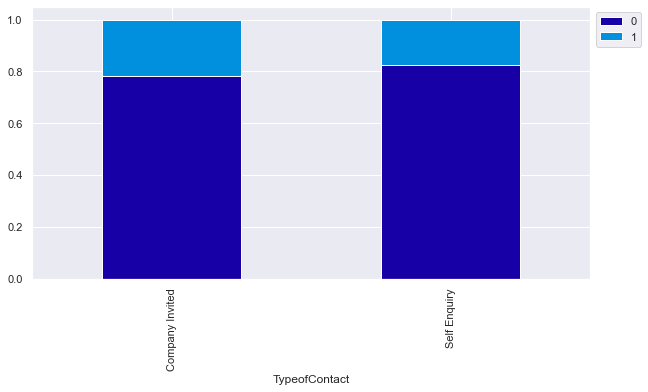

In [58]:
stacked_plot(newdata['TypeofContact'])

- Persons who do self enquiry tend not to buy the packages more than company invited

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


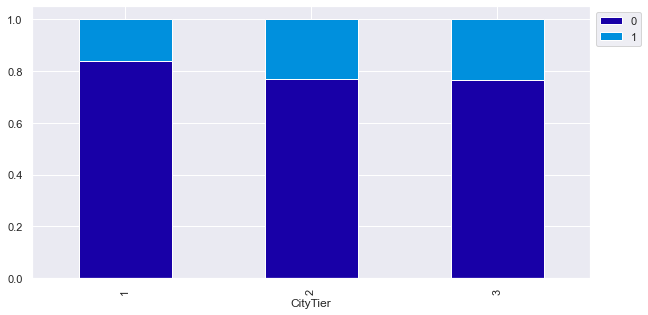

In [59]:
stacked_plot(newdata['CityTier'])

- Persons from Tier 1 cities buy less than 2 or 3

ProdTaken           0    1   All
DurationOfPitch                 
5.0                 6    0     6
6.0               268   39   307
7.0               294   48   342
8.0               273   60   333
9.0               404   79   483
10.0              199   45   244
11.0              168   37   205
12.0              162   33   195
13.0              397   77   474
14.0              212   41   253
15.0              217   52   269
16.0              218   56   274
17.0              148   24   172
18.0               56   19    75
19.0               36   21    57
20.0               46   19    65
21.0               57   16    73
22.0               66   23    89
23.0               58   21    79
24.0               54   16    70
25.0               59   14    73
26.0               60   12    72
27.0               58   14    72
28.0               44   17    61
29.0               53   21    74
30.0               65   30    95
31.0               52   31    83
32.0               59   15    74
33.0      

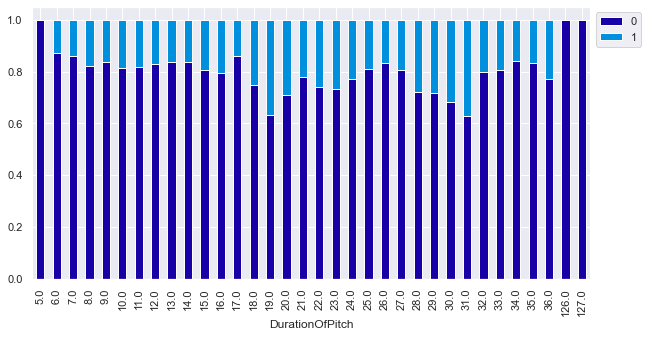

In [60]:
stacked_plot(newdata['DurationOfPitch'])

- There are definetely outliers but the looks to be at 19, 30, and 31 minutes

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


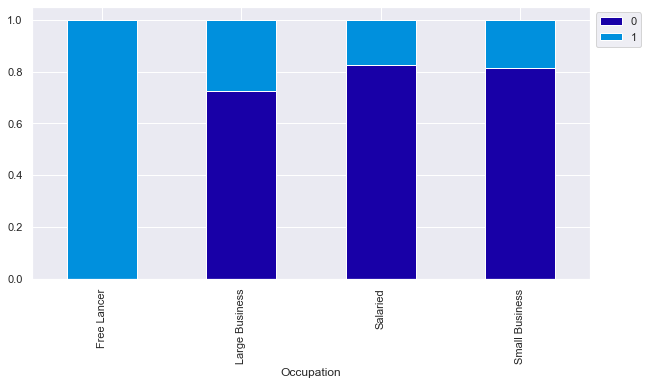

In [61]:
stacked_plot(newdata['Occupation'])

- Marketing to large business looks to be effective

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


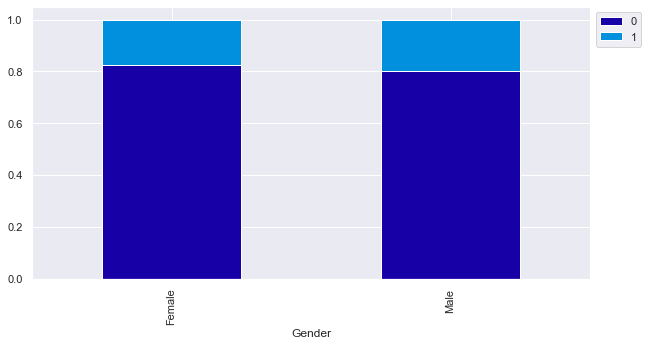

In [62]:
stacked_plot(newdata['Gender'])

- The percentages are very similar in between male and female

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


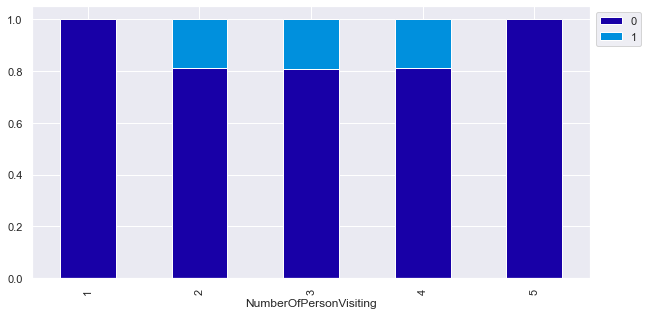

In [63]:
stacked_plot(newdata['NumberOfPersonVisiting'])

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1726  387  2113
5.0                 577  191   768
6.0                  82   54   136
All                3968  920  4888
------------------------------------------------------------------------------------------------------------------------


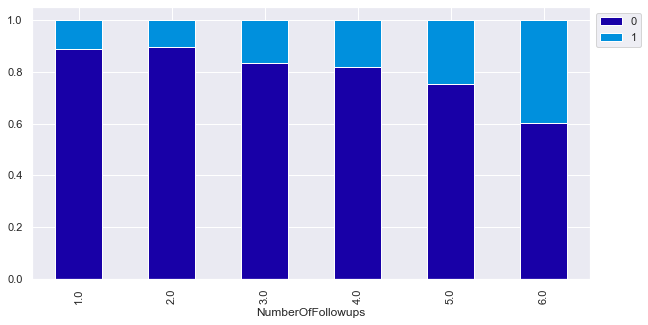

In [64]:
stacked_plot(newdata['NumberOfFollowups'])

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


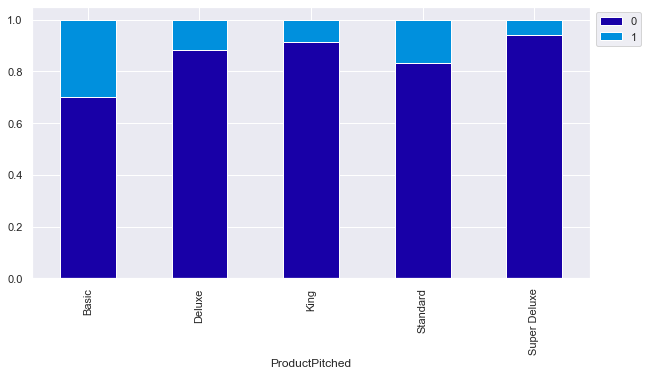

In [65]:
stacked_plot(newdata['ProductPitched'])

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


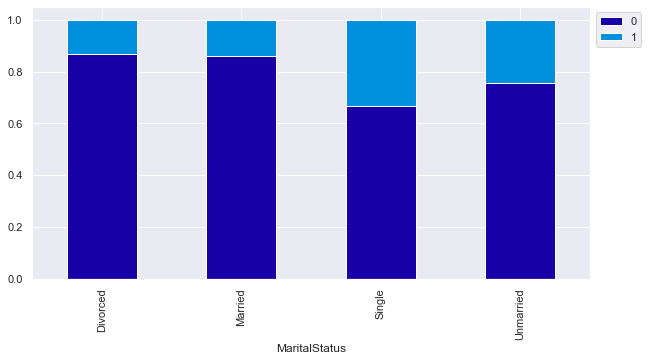

In [66]:
stacked_plot(newdata['MaritalStatus'])

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


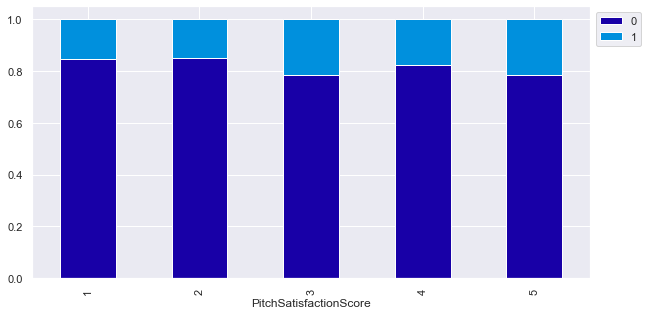

In [67]:
stacked_plot(newdata['PitchSatisfactionScore'])

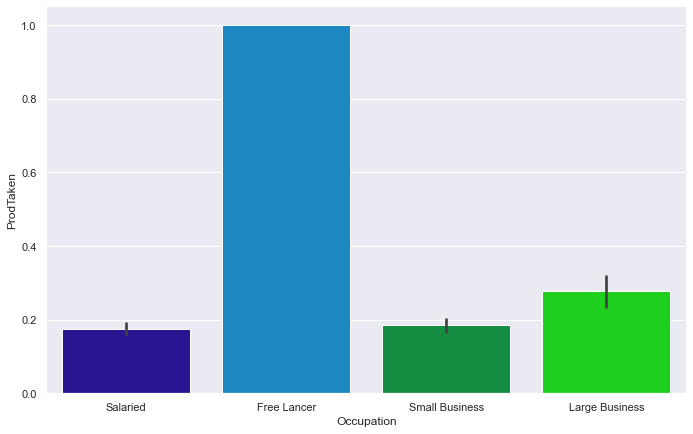

In [68]:
sns.catplot(x="Occupation", y="ProdTaken", data=newdata, kind='bar', height=6, aspect=1.6, estimator=np.mean);

- Another view to confirm that Large Business tends to accept the product better

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


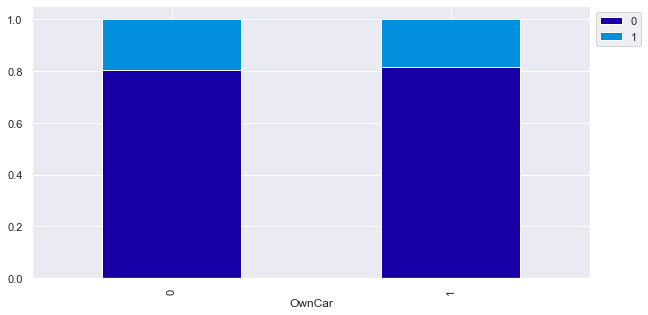

In [69]:
stacked_plot(newdata['OwnCar'])

- Slight advantage for the product to be purchased if you do not have a car

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* ProdTaken is the dependent variable for the estimators

**Data Cleaning:**


* Removed CustomerID as it will not bring any prediction value to the models
* Made all objects into categories
* Imputed median values for continuous variables and mode for discrete ones



### Fixing the data types

In [70]:
cols = newdata.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [71]:
for i in cols.columns:
    newdata[i] = newdata[i].astype('category')

In [72]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   int64 

## Split the dataset

In [73]:
X = newdata.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = newdata['ProdTaken']

In [74]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 28) (1467, 28)


In [75]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [76]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will buy the product and the customer doesn't buy the product
2. Predicting a customer will not buy the product and the customer ends up buying the product

### Which case is more important? 
* Predicting that the customer will buy the product but he does not i.e. losing a sale that might be already in the forecast. I did not chose recall as that will predict a customer that was predicted not to  not buy the package but ended up buying it.

### How to reduce this loss i.e need to reduce False Postives?
* Company wants Precision to be maximized, greater the Precision the chances of minimizing false positives. Hence, the focus should be on increasing Precision or minimizing the false positives

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [77]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [78]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [79]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [80]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.81,1:0.19} to the model to specify the weight of each class and the decision tree will give more weightage to class 0.

* class_weight is a hyperparameter for the decision tree classifier.

In [81]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.81,1:0.19},random_state=1)

In [82]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.81, 1: 0.19}, random_state=1)

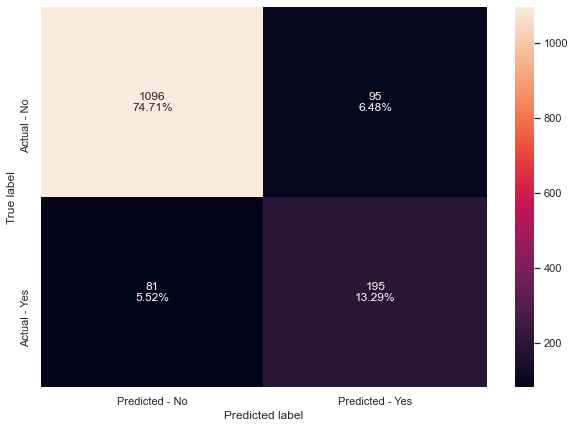

In [83]:
make_confusion_matrix(dtree,y_test)

**Confusion Matrix -**

* Customer bought and the model predicted it correctly that is customer will buy :  True Positive (observed=1,predicted=1)

* Customer didn't buy and the model predicted customer will buy : False Positive (observed=0,predicted=1)

* Customer didn't buy and the model predicted customer will not buy : True Negative (observed=0,predicted=0)

* Customer bought and the model predicted that customer won't : False Negative (observed=1,predicted=0)

In [84]:
dtree_acc = get_accuracy_score(dtree)
dtree_recall = get_recall_score(dtree)
dtree_precision = get_precision_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.880027266530334
Recall on training set :  1.0
Recall on test set :  0.7065217391304348
Precision on training set :  1.0
Precision on test set :  0.6724137931034483


* Decision tree is working well on the training data but is not able to generalize well on the test data concerning the precision.

### Bagging Classifier

In [85]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

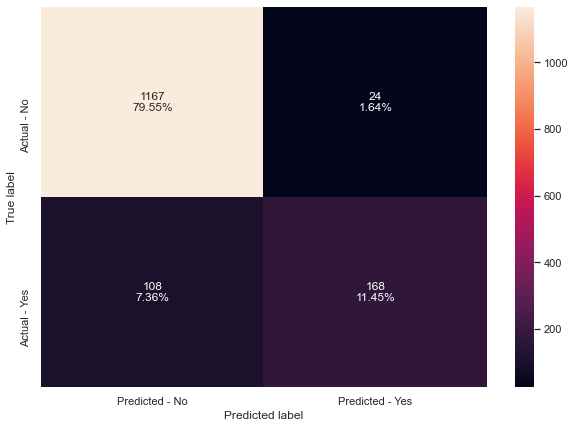

In [86]:
make_confusion_matrix(bagging,y_test)

In [87]:
bagging_acc = get_accuracy_score(bagging)
bagging_recall = get_recall_score(bagging)
bagging_precision = get_precision_score(bagging)

Accuracy on training set :  0.9950306927798889
Accuracy on test set :  0.9100204498977505
Recall on training set :  0.9736024844720497
Recall on test set :  0.6086956521739131
Precision on training set :  1.0
Precision on test set :  0.875


* Bagging classifier is overfitting a bit the training set and is performing good on the test set in terms of precision.

**Bagging Classifier with weighted decision tree**

In [88]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.81,1:0.19},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.81,
                                                                      1: 0.19},
                                                        random_state=1),
                  random_state=1)

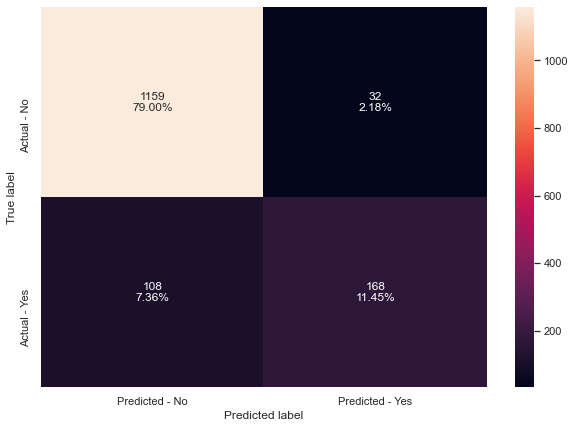

In [89]:
make_confusion_matrix(bagging_wt,y_test)

In [90]:
wt_bagging_acc = get_accuracy_score(bagging_wt)
wt_bagging_recall = get_recall_score(bagging_wt)
wt_bagging_precision = get_precision_score(bagging_wt)

Accuracy on training set :  0.9929845074539608
Accuracy on test set :  0.9045671438309475
Recall on training set :  0.9627329192546584
Recall on test set :  0.6086956521739131
Precision on training set :  1.0
Precision on test set :  0.84


* Bagging classifier with a weighted decision tree is giving very good accuracy and prediction but is not able to generalize well on test data in terms of precision.

### Random Forest

In [91]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

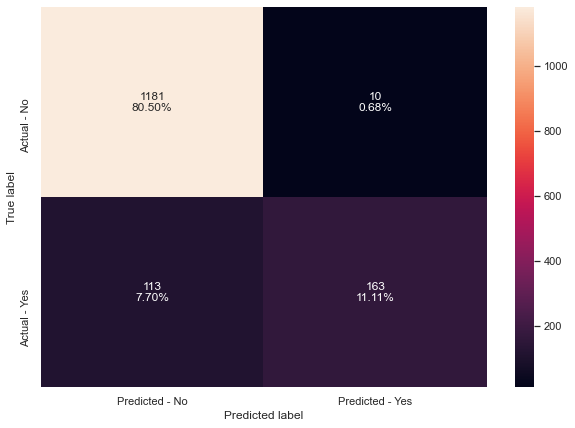

In [92]:
make_confusion_matrix(rf,y_test)

In [93]:
rf_acc = get_accuracy_score(rf)
rf_recall = get_recall_score(rf)
rf_precision = get_precision_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9161554192229039
Recall on training set :  1.0
Recall on test set :  0.5905797101449275
Precision on training set :  1.0
Precision on test set :  0.9421965317919075


* Random Forest has performed well in terms of accuracy as well as  precision

**Random forest with class weights**

In [94]:
rf_wt = RandomForestClassifier(class_weight={0:0.81,1:0.19}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.81, 1: 0.19}, random_state=1)

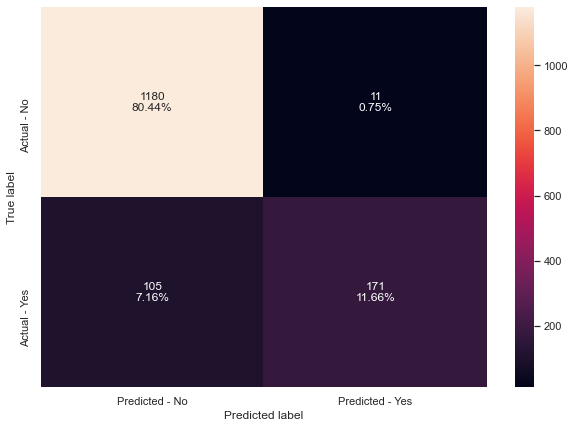

In [95]:
make_confusion_matrix(rf_wt,y_test)

In [96]:
wt_rf_acc = get_accuracy_score(rf_wt)
wt_rf_recall = get_recall_score(rf_wt)
wt_rf_precision = get_precision_score(rf_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.9209270620313565
Recall on training set :  1.0
Recall on test set :  0.6195652173913043
Precision on training set :  1.0
Precision on test set :  0.9395604395604396


* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

### Tuning Models

### Using GridSearch for Hyperparameter tuning model

**Tuning Decision Tree**

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.81,1:0.19},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.81, 1: 0.19}, max_depth=7,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

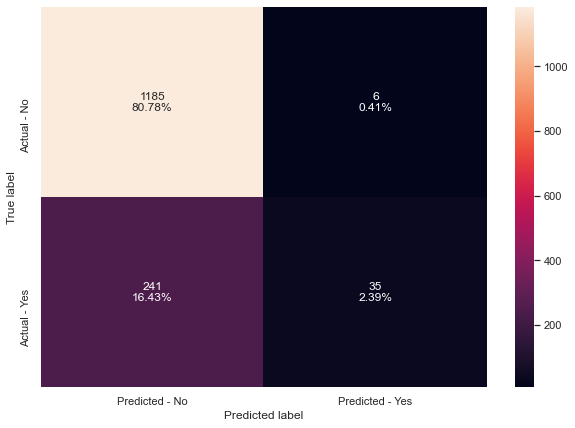

In [99]:
make_confusion_matrix(dtree_estimator,y_test)

In [100]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator)
tuned_dtree_recall = get_recall_score(dtree_estimator)
tuned_dtree_precision = get_precision_score(dtree_estimator)

Accuracy on training set :  0.844489915229465
Accuracy on test set :  0.8316291751874574
Recall on training set :  0.18012422360248448
Recall on test set :  0.12681159420289856
Precision on training set :  0.9666666666666667
Precision on test set :  0.8536585365853658


* Overfitting in decision tree has reduced but the precision has also reduced.

**Tuning Bagging Classifier**

In [101]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.81,1:0.19},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.81,
                                                                                 1: 0.19},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [102]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.81,
                                                                      1: 0.19},
                                                        random_state=1),
                  max_features=0.9, n_estimators=101, random_state=1)

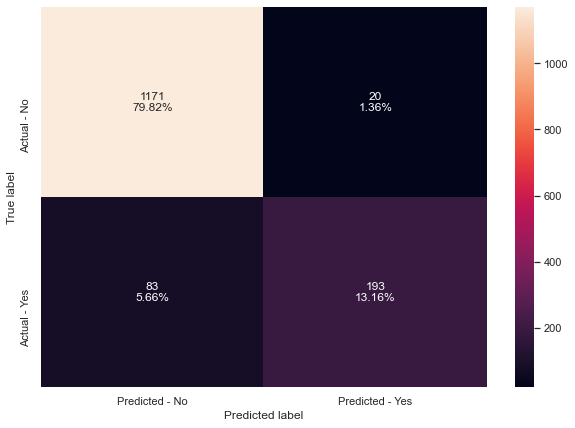

In [103]:
make_confusion_matrix(bagging_estimator,y_test)

In [104]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)
tuned_bagging_recall = get_recall_score(bagging_estimator)
tuned_bagging_precision = get_precision_score(bagging_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9297886843899114
Recall on training set :  1.0
Recall on test set :  0.6992753623188406
Precision on training set :  1.0
Precision on test set :  0.9061032863849765


* This model is better well balanced, reduce the overfitting, improved recall and good precision

**Tuning Random Forest**

In [108]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1, verbose=3,n_jobs=-1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='precision',cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 1 of 110
building tree 2 of 110building tree 3 of 110
building tree 4 of 110building tree 5 of 110
building tree 6 of 110
building tree 7 of 110building tree 8 of 110



building tree 9 of 110
building tree 10 of 110
building tree 11 of 110
building tree 12 of 110building tree 13 of 110building tree 14 of 110
building tree 15 of 110
building tree 16 of 110


building tree 17 of 110
building tree 18 of 110building tree 19 of 110
building tree 20 of 110

building tree 21 of 110
building tree 22 of 110
building tree 23 of 110
building tree 24 of 110
building tree 25 of 110building tree 26 of 110

building tree 27 of 110building tree 28 of 110building tree 29 of 110building tree 30 of 110

building tree 31 of 110building tree 32 of 110



building tree 33 of 110building tree 34 of 110

building tree 35 of 110building tree 36 of 110
building tree 37 of 110building tree 38 of 110


building tree 39 of 110
building tree 40 of 110
building tree 41 of 110
building tree 42 of 110
b

[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    0.2s finished


RandomForestClassifier(max_features='log2', max_samples=0.9, n_estimators=110,
                       n_jobs=-1, random_state=1, verbose=3)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 110 out of 110 | elapsed:    0.1s finished


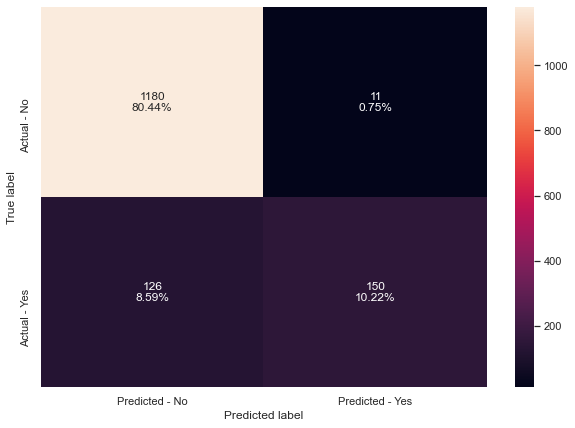

In [109]:
make_confusion_matrix(rf_estimator,y_test)

In [110]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_job

Accuracy on training set :  1.0
Accuracy on test set :  0.9066121336059987
Recall on training set :  1.0
Recall on test set :  0.5434782608695652
Precision on training set :  1.0
Precision on test set :  0.9316770186335404


[Parallel(n_jobs=8)]: Done 110 out of 110 | elapsed:    0.0s finished


* Random forest after tuning has given similar performance as un-tuned random forest.

### Comparing all the models

In [111]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 110 out of 110 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_job

In [112]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Weighted Bagging Classifier','Tuned Bagging Classifier',
                                          'Random Forest','Weighted Random Forest','Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.000000,0.880027,1.000000,0.706522,1.000000,0.672414
1,Tuned Decision Tree,0.844490,0.831629,0.180124,0.126812,0.966667,0.853659
2,Bagging Classifier,0.995031,0.910020,0.973602,0.608696,1.000000,0.875000
3,Weighted Bagging Classifier,0.992985,0.904567,0.962733,0.608696,1.000000,0.840000
4,Tuned Bagging Classifier,1.000000,0.929789,1.000000,0.699275,1.000000,0.906103
5,Random Forest,1.000000,0.916155,1.000000,0.590580,1.000000,0.942197
6,Weighted Random Forest,1.000000,0.920927,1.000000,0.619565,1.000000,0.939560
7,Tuned Random Forest,1.000000,0.906612,1.000000,0.543478,1.000000,0.931677


* Random Forest, weighted random forest and tuned random forest performed well on training and test set.
* All models did relatively ok in not overfitting the data
* Weighted Random Forest with default parameters performed better in recall and high in precision - As the final results depend on the parameters used/checked using GridSearchCV, There may be yet better parameters which may result in a better performance.

### Feature importance of Random Forest

In [113]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.129536
Age                          0.122191
DurationOfPitch              0.100428
Passport                     0.069398
NumberOfTrips                0.064524
PitchSatisfactionScore       0.056655
NumberOfFollowups            0.055707
PreferredPropertyStar        0.042556
CityTier                     0.036494
Designation_Executive        0.030650
NumberOfChildrenVisiting     0.030453
NumberOfPersonVisiting       0.028751
MaritalStatus_Single         0.027011
TypeofContact_Self Enquiry   0.025111
Gender_Male                  0.024934
OwnCar                       0.021215
Occupation_Small Business    0.019738
Occupation_Salaried          0.019421
MaritalStatus_Married        0.017482
MaritalStatus_Unmarried      0.016705
Occupation_Large Business    0.016277
Designation_Manager          0.010487
ProductPitched_Deluxe        0.009446
Designation_Senior Manager   0.007590
ProductPitched_Standard      0.007488
ProductPitch

In [114]:
feature_names = X_train.columns

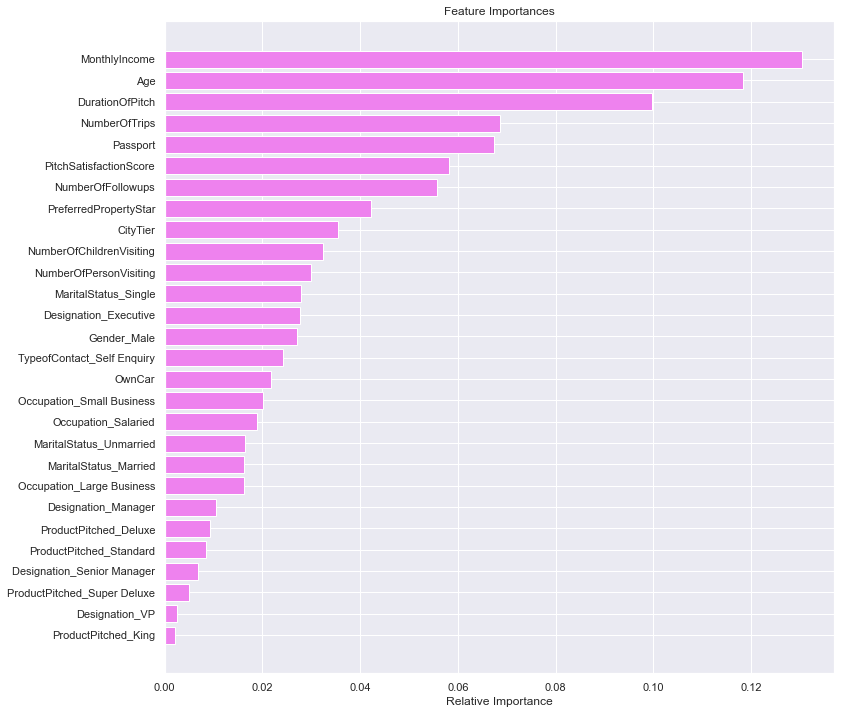

In [115]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Monthly income is the most important feature for prediction followed by Age, DurationOfPitch, Passport and NumberofTrips

In [116]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [117]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### AdaBoost Classifier

In [118]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [119]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.844489915229465
Accuracy on test set :  0.8500340831629175
Recall on training set :  0.31832298136645965
Recall on test set :  0.32608695652173914
Precision on training set :  0.6879194630872483
Precision on test set :  0.7258064516129032


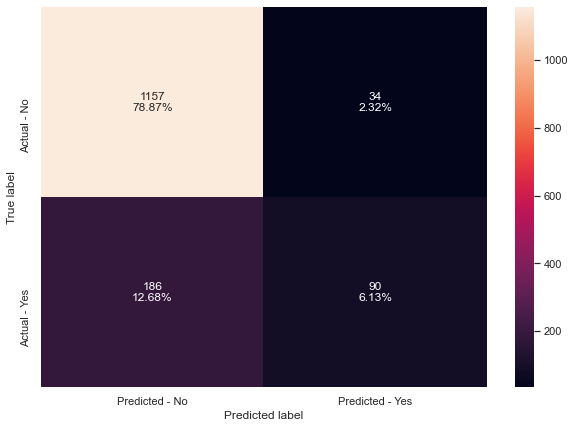

In [120]:
make_confusion_matrix(abc,y_test)

- Precision and recall are in bad shape using AdaBooster

### Gradient Boosting Classifier

In [121]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [122]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8830751242326805
Accuracy on test set :  0.8684389911383776
Recall on training set :  0.43788819875776397
Recall on test set :  0.40217391304347827
Precision on training set :  0.88125
Precision on test set :  0.7985611510791367


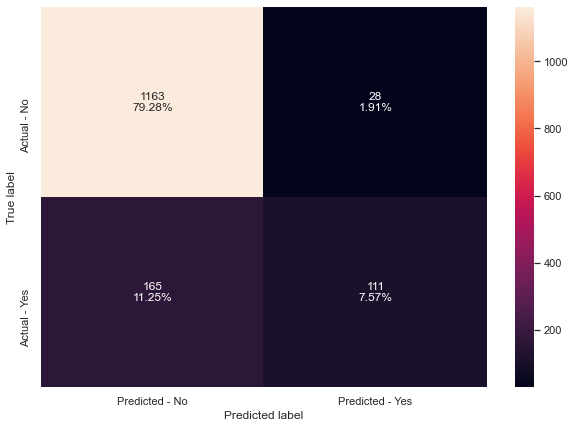

In [123]:
make_confusion_matrix(gbc,y_test)

- Precision a bit improved over AdaBooster

### XGBoost Classifier

In [124]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [125]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9263803680981595
Recall on training set :  0.9984472049689441
Recall on test set :  0.6920289855072463
Precision on training set :  1.0
Precision on test set :  0.8925233644859814


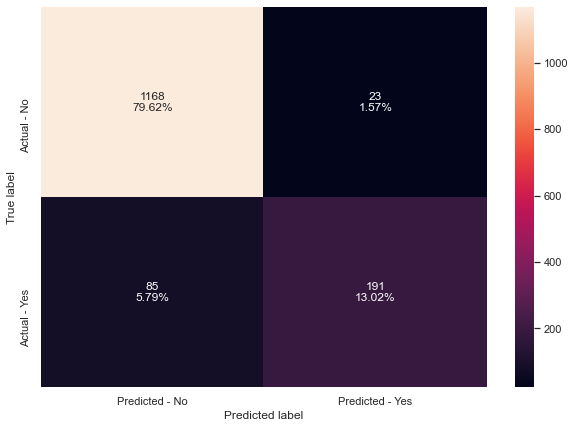

In [126]:
make_confusion_matrix(xgb,y_test)

**With default parameters:**
- XGB classifier has better test accuracy among these 3 models.
- XGB classifier has best precision among these three models

## Hyperparameter Tuning

### AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [128]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.4, n_estimators=10, random_state=1)

In [129]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.8173048816135633
Accuracy on test set :  0.8186775732788003
Recall on training set :  0.031055900621118012
Recall on test set :  0.03985507246376811
Precision on training set :  0.9523809523809523
Precision on test set :  0.9166666666666666


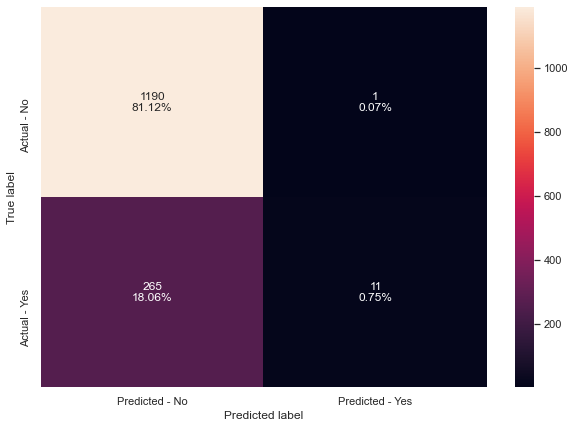

In [130]:
make_confusion_matrix(abc_tuned,y_test)

### Insights
- The model has higher test precision once tuned. 

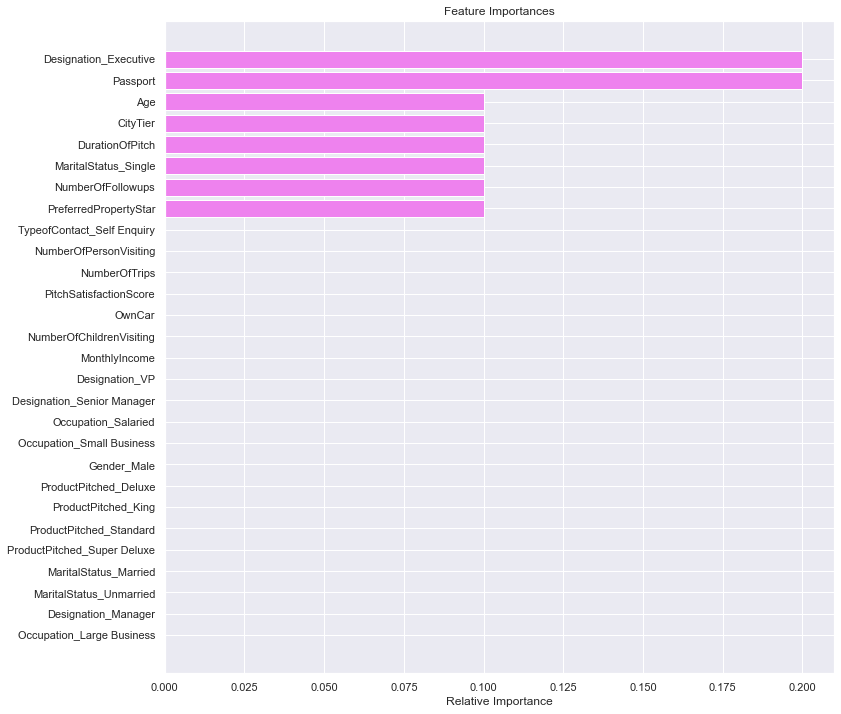

In [131]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Designation Executive is the most important feature in Adaboost

### Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

** Using AdaBoost classifier as the estimator for initial predictions**

In [132]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [133]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8865828705057001
Accuracy on test set :  0.8657123381049762
Recall on training set :  0.4518633540372671
Recall on test set :  0.38405797101449274
Precision on training set :  0.8926380368098159
Precision on test set :  0.7969924812030075


**As compared to the model with default parameters:**

- Precision better on test

In [134]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

In [135]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.850336159017831
Accuracy on test set :  0.8398091342876619
Recall on training set :  0.2111801242236025
Recall on test set :  0.17028985507246377
Precision on training set :  0.9714285714285714
Precision on test set :  0.8867924528301887


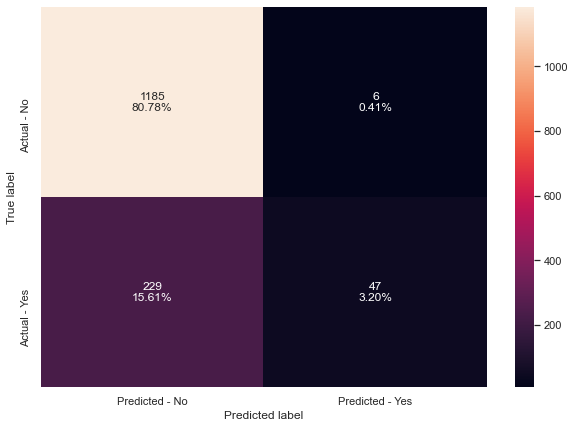

In [136]:
make_confusion_matrix(gbc_tuned,y_test)

### Insights
- The model performace has decreased in precision


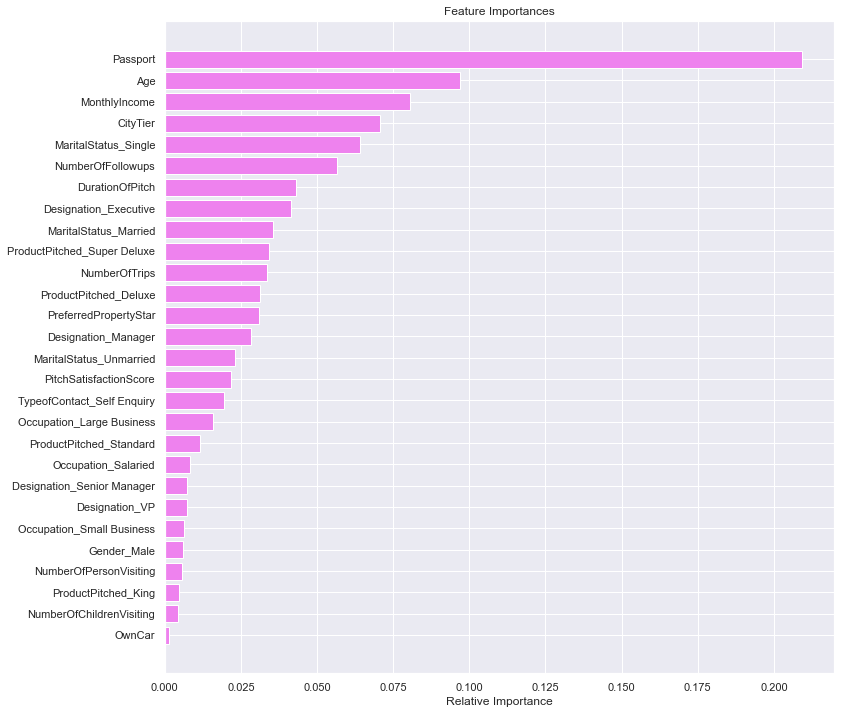

In [137]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport, age and monthly income are the most important features

## Comparing all models

In [138]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [139]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.84,0.85,0.32,0.33,0.69,0.73
1,AdaBoost Tuned,0.82,0.82,0.03,0.04,0.95,0.92
2,Gradient Boosting with default parameters,0.88,0.87,0.44,0.40,0.88,0.80
3,Gradient Boosting with init=AdaBoost,0.89,0.87,0.45,0.38,0.89,0.80
4,Gradient Boosting Tuned,0.85,0.84,0.21,0.17,0.97,0.89
5,XGBoost with default parameters,1.00,0.93,1.00,0.69,1.00,0.89


### Insights and Recommendations:
- The best model for increasing precision is Random Forest
- Wehn increasing precision we increase the ability to detect false positives
- False positives are of particular importanc since most companies forecast their operations on future sales. If we have a set of customers that are forecasted to make the buy but end up not doing it then we run the risk of overforecasting
- In general Monthly income and age are the most important features or all models therefore they need to be considered when making decisions

